In [1]:
# Import dependencies.
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [4]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [7]:
# Find the most recent date in the data set.
recentMost = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
recentMost

'2017-08-23'

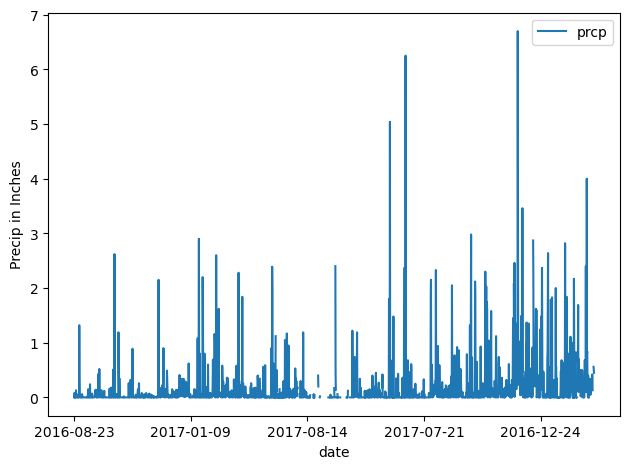

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
data = [measurement.date, measurement.prcp]

# Calculate the date one year from the last date in data set.
year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_query = session.query(*data).filter(measurement.date.between(str(year), recentMost)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_query, columns=['date', 'prcp'])

# Sort the dataframe by date
precip_df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.ylabel('Precip in Inches')
plt.savefig('precip.png')
plt.tight_layout()
plt.show()

In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
numStation = session.query(station.station).distinct().count()
numStation

9

In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active[0][0]

act_info = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
act_query = session.query(*act_info).filter(measurement.station==most_active).all()
act_query

[(54.0, 85.0, 71.66378066378067)]

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
act_year_query = session.query(measurement.tobs).filter(measurement.date.between(str(year), recentMost)).all()
active_df = pd.DataFrame(act_year_query)

active_df.describe()

,tobs
count,2230.000000
mean,74.590583
std,4.611667
min,58.000000
25%,72.000000
50%,75.000000
75%,78.000000
max,87.000000


In [ ]:
active_df.plot.hist()
plt.ylabel('Frequency')
plt.xlabel('Temp')
plt.savefig('Temps.png')
plt.tight_layout()
plt.show()